In [1]:
import pandas as pd, numpy as np

In [2]:
train_data = pd.read_csv('train.csv')

In [3]:
test_data = pd.read_csv('test.csv')

In [4]:
train_data.head(10)

,UserID,realtionship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_guarantee,netgain
0,UI_9185,Married-civ-spouse,Pharma,Comedy,Male,40,Daytime,United-States,0.027465,Medium,No,0
1,UI_449,Never-married,Political,Comedy,Male,35,Morning,International,0.027465,Low,No,0
2,UI_9014,Never-married,Auto,Comedy,Male,40,Morning,United-States,0.027465,Low,No,0
3,UI_14987,Married-civ-spouse,Pharma,Infomercial,Male,40,Primetime,United-States,0.027465,Low,Yes,0
4,UI_25532,Married-civ-spouse,Other,Comedy,Female,50,Primetime,United-States,0.027465,Low,Yes,1
5,UI_22292,Married-civ-spouse,Pharma,Comedy,Male,40,Daytime,United-States,0.027465,High,No,0
6,UI_22389,Married-civ-spouse,Pharma,Comedy,Male,80,Primetime,United-States,0.027465,Low,Yes,0
7,UI_17,Married-civ-spouse,Pharma,Comedy,Male,40,Primetime,Mexico,0.027465,High,Yes,0
8,UI_11739,Married-civ-spouse,Pharma,Comedy,Male,40,Morning,United-States,0.027465,Low,Yes,0
9,UI_16904,Married-civ-spouse,Other,Comedy,Female,25,Primetime,United-States,0.027465,High,No,0


In [5]:
train_df = train_data.drop('UserID',1)
train_df.head(5)

,realtionship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_guarantee,netgain
0,Married-civ-spouse,Pharma,Comedy,Male,40,Daytime,United-States,0.027465,Medium,No,0
1,Never-married,Political,Comedy,Male,35,Morning,International,0.027465,Low,No,0
2,Never-married,Auto,Comedy,Male,40,Morning,United-States,0.027465,Low,No,0
3,Married-civ-spouse,Pharma,Infomercial,Male,40,Primetime,United-States,0.027465,Low,Yes,0
4,Married-civ-spouse,Other,Comedy,Female,50,Primetime,United-States,0.027465,Low,Yes,1


In [6]:
train_df['realtionship_status'].value_counts()

Married-civ-spouse       8899
Never-married            6433
Divorced                 2700
Widowed                   616
Separated                 598
Married-spouse-absent     274
Married-AF-spouse          16
Name: realtionship_status, dtype: int64

In [7]:
import matplotlib.pyplot as plt
train_df.groupby('realtionship_status')['netgain'].value_counts().plot(kind='bar')

In [8]:
train_df['genre'].value_counts()

Comedy         16699
Infomercial     1871
Drama            612
Direct           186
Other            168
Name: genre, dtype: int64

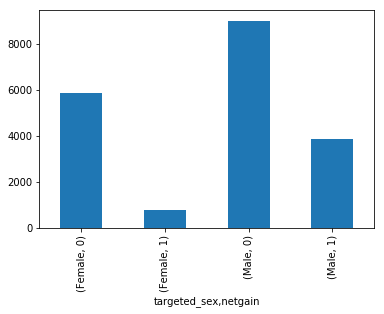

In [9]:
train_df.groupby('targeted_sex')['netgain'].value_counts().plot(kind='bar')

In [10]:
print('Airtime Frequancy')
print(train_df['airtime'].value_counts())
print('********************************************')
print('Advertisement Location')
print(train_df['airlocation'].value_counts())
print('********************************************')


Airtime Frequancy
Primetime    11755
Morning       6397
Daytime       1384
Name: airtime, dtype: int64
********************************************
Advertisement Location
United-States                 17434
Mexico                          394
International                   355
Philippines                     112
Germany                          75
Cuba                             68
Puerto-Rico                      65
Canada                           65
El-Salvador                      64
India                            62
England                          56
Italy                            52
Guatemala                        50
South                            48
Poland                           47
Dominican-Republic               47
Jamaica                          46
Vietnam                          45
Columbia                         42
Japan                            38
China                            36
Iran                             31
Taiwan                           29
H

In [11]:
print(train_df['money_back_guarantee'].value_counts())

Yes    9788
No     9748
Name: money_back_guarantee, dtype: int64


In [12]:
for i in range(train_df.shape[0]):
    if(train_df['money_back_guarantee'].iloc[i]=='Yes'):
        train_df['money_back_guarantee'].iloc[i]=1
    else:
        train_df['money_back_guarantee'].iloc[i]=0

C:\Users\sadiq\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [13]:
train_df.head(5)

,realtionship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_guarantee,netgain
0,Married-civ-spouse,Pharma,Comedy,Male,40,Daytime,United-States,0.027465,Medium,0,0
1,Never-married,Political,Comedy,Male,35,Morning,International,0.027465,Low,0,0
2,Never-married,Auto,Comedy,Male,40,Morning,United-States,0.027465,Low,0,0
3,Married-civ-spouse,Pharma,Infomercial,Male,40,Primetime,United-States,0.027465,Low,1,0
4,Married-civ-spouse,Other,Comedy,Female,50,Primetime,United-States,0.027465,Low,1,1


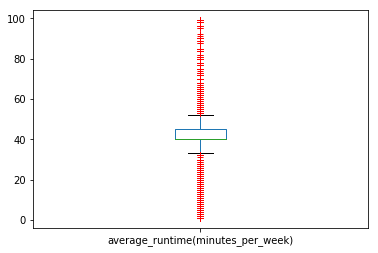

In [14]:
train_df['average_runtime(minutes_per_week)'].plot.box(sym='r+')

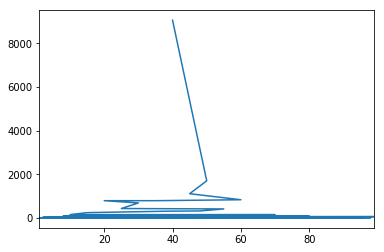

In [15]:
train_df['average_runtime(minutes_per_week)'].value_counts().plot()

In [16]:
top_10_locat = [x for x in train_df['airlocation'].value_counts().sort_values(ascending= False).head(20).index]
top_10_locat

['United-States',
 'Mexico',
 'International',
 'Philippines',
 'Germany',
 'Cuba',
 'Puerto-Rico',
 'Canada',
 'El-Salvador',
 'India',
 'England',
 'Italy',
 'Guatemala',
 'South',
 'Poland',
 'Dominican-Republic',
 'Jamaica',
 'Vietnam',
 'Columbia',
 'Japan']

In [17]:
for i in top_10_locat:
    train_df[i] = np.where(train_df['airlocation']== i,1,0)
train_df[['airlocation']+top_10_locat].head(40)

,airlocation,United-States,Mexico,International,Philippines,Germany,Cuba,Puerto-Rico,Canada,El-Salvador,...,England,Italy,Guatemala,South,Poland,Dominican-Republic,Jamaica,Vietnam,Columbia,Japan
0,United-States,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,International,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,United-States,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,United-States,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,United-States,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,United-States,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,United-States,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Mexico,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,United-States,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,United-States,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
train_df.head(10)

,realtionship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_guarantee,...,England,Italy,Guatemala,South,Poland,Dominican-Republic,Jamaica,Vietnam,Columbia,Japan
0,Married-civ-spouse,Pharma,Comedy,Male,40,Daytime,United-States,0.027465,Medium,0,...,0,0,0,0,0,0,0,0,0,0
1,Never-married,Political,Comedy,Male,35,Morning,International,0.027465,Low,0,...,0,0,0,0,0,0,0,0,0,0
2,Never-married,Auto,Comedy,Male,40,Morning,United-States,0.027465,Low,0,...,0,0,0,0,0,0,0,0,0,0
3,Married-civ-spouse,Pharma,Infomercial,Male,40,Primetime,United-States,0.027465,Low,1,...,0,0,0,0,0,0,0,0,0,0
4,Married-civ-spouse,Other,Comedy,Female,50,Primetime,United-States,0.027465,Low,1,...,0,0,0,0,0,0,0,0,0,0
5,Married-civ-spouse,Pharma,Comedy,Male,40,Daytime,United-States,0.027465,High,0,...,0,0,0,0,0,0,0,0,0,0
6,Married-civ-spouse,Pharma,Comedy,Male,80,Primetime,United-States,0.027465,Low,1,...,0,0,0,0,0,0,0,0,0,0
7,Married-civ-spouse,Pharma,Comedy,Male,40,Primetime,Mexico,0.027465,High,1,...,0,0,0,0,0,0,0,0,0,0
8,Married-civ-spouse,Pharma,Comedy,Male,40,Morning,United-States,0.027465,Low,1,...,0,0,0,0,0,0,0,0,0,0
9,Married-civ-spouse,Other,Comedy,Female,25,Primetime,United-States,0.027465,High,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
pd.set_option('display.max_columns', None)

In [20]:
train_df.head()

,realtionship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_guarantee,netgain,United-States,Mexico,International,Philippines,Germany,Cuba,Puerto-Rico,Canada,El-Salvador,India,England,Italy,Guatemala,South,Poland,Dominican-Republic,Jamaica,Vietnam,Columbia,Japan
0,Married-civ-spouse,Pharma,Comedy,Male,40,Daytime,United-States,0.027465,Medium,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Never-married,Political,Comedy,Male,35,Morning,International,0.027465,Low,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Never-married,Auto,Comedy,Male,40,Morning,United-States,0.027465,Low,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Married-civ-spouse,Pharma,Infomercial,Male,40,Primetime,United-States,0.027465,Low,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Married-civ-spouse,Other,Comedy,Female,50,Primetime,United-States,0.027465,Low,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [21]:
train_df['expensive'].value_counts()

Low       11756
High       5453
Medium     2327
Name: expensive, dtype: int64

In [22]:
for i in range(train_df.shape[0]):
    if(train_df['expensive'].iloc[i]=='Low'):
        train_df['expensive'].iloc[i]= 0
    if(train_df['expensive'].iloc[i]=='Medium'):
        train_df['expensive'].iloc[i]=1
    if(train_df['expensive'].iloc[i]=='High'):
        train_df['expensive'].iloc[i]=2
train_df.head(5)

,realtionship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_guarantee,netgain,United-States,Mexico,International,Philippines,Germany,Cuba,Puerto-Rico,Canada,El-Salvador,India,England,Italy,Guatemala,South,Poland,Dominican-Republic,Jamaica,Vietnam,Columbia,Japan
0,Married-civ-spouse,Pharma,Comedy,Male,40,Daytime,United-States,0.027465,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Never-married,Political,Comedy,Male,35,Morning,International,0.027465,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Never-married,Auto,Comedy,Male,40,Morning,United-States,0.027465,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Married-civ-spouse,Pharma,Infomercial,Male,40,Primetime,United-States,0.027465,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Married-civ-spouse,Other,Comedy,Female,50,Primetime,United-States,0.027465,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [23]:
for i in range(train_df.shape[0]):
    if(train_df['targeted_sex'].iloc[i]=='Male'):
        train_df['targeted_sex'].iloc[i]= 1
    if(train_df['targeted_sex'].iloc[i]=='Female'):
        train_df['targeted_sex'].iloc[i]=0

In [24]:
train_df.head()

,realtionship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_guarantee,netgain,United-States,Mexico,International,Philippines,Germany,Cuba,Puerto-Rico,Canada,El-Salvador,India,England,Italy,Guatemala,South,Poland,Dominican-Republic,Jamaica,Vietnam,Columbia,Japan
0,Married-civ-spouse,Pharma,Comedy,1,40,Daytime,United-States,0.027465,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Never-married,Political,Comedy,1,35,Morning,International,0.027465,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Never-married,Auto,Comedy,1,40,Morning,United-States,0.027465,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Married-civ-spouse,Pharma,Infomercial,1,40,Primetime,United-States,0.027465,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Married-civ-spouse,Other,Comedy,0,50,Primetime,United-States,0.027465,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [25]:
train_df.shape

(19536, 31)

In [26]:
relatnshp=pd.get_dummies(train_df["realtionship_status"],drop_first=True)
industry=pd.get_dummies(train_df['industry'],drop_first=True)
genre=pd.get_dummies(train_df['genre'],drop_first=True)

In [27]:
train_df.groupby(['airtime'])['netgain'].mean() 

airtime
Daytime      0.264451
Morning      0.065187
Primetime    0.328966
Name: netgain, dtype: float64

In [28]:
Mean_encoded_airtime = train_df.groupby(['airtime'])['netgain'].mean().to_dict() 
  
train_df['airtime_mean_encode'] =  train_df['airtime'].map(Mean_encoded_airtime) 

train_df.head()

,realtionship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_guarantee,netgain,United-States,Mexico,International,Philippines,Germany,Cuba,Puerto-Rico,Canada,El-Salvador,India,England,Italy,Guatemala,South,Poland,Dominican-Republic,Jamaica,Vietnam,Columbia,Japan,airtime_mean_encode
0,Married-civ-spouse,Pharma,Comedy,1,40,Daytime,United-States,0.027465,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.264451
1,Never-married,Political,Comedy,1,35,Morning,International,0.027465,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.065187
2,Never-married,Auto,Comedy,1,40,Morning,United-States,0.027465,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.065187
3,Married-civ-spouse,Pharma,Infomercial,1,40,Primetime,United-States,0.027465,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.328966
4,Married-civ-spouse,Other,Comedy,0,50,Primetime,United-States,0.027465,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.328966


In [29]:
train = pd.concat([train_df,relatnshp,industry,genre],axis=1)
tr_df = train.drop(['realtionship_status','industry','genre','airtime'],axis=1)


In [30]:
tr_df.drop('airlocation',1,inplace=True)
tr_df.head()

C:\Users\sadiq\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,targeted_sex,average_runtime(minutes_per_week),ratings,expensive,money_back_guarantee,netgain,United-States,Mexico,International,Philippines,Germany,Cuba,Puerto-Rico,Canada,El-Salvador,India,England,Italy,Guatemala,South,Poland,Dominican-Republic,Jamaica,Vietnam,Columbia,Japan,airtime_mean_encode,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed,ClassAction,Entertainment,Other,Pharma,Political,Direct,Drama,Infomercial,Other
0,1,40,0.027465,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.264451,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
1,1,35,0.027465,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.065187,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
2,1,40,0.027465,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.065187,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,40,0.027465,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.328966,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0,50,0.027465,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.328966,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [31]:
tr_df['netgain'].value_counts()

0    14886
1     4650
Name: netgain, dtype: int64

In [32]:
from sklearn.model_selection import train_test_split
X = tr_df.drop('netgain',1)
y = tr_df['netgain']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [33]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[['average_runtime(minutes_per_week)','ratings']] = sc.fit_transform(X_train[['average_runtime(minutes_per_week)','ratings']])
X_test[['average_runtime(minutes_per_week)','ratings']] = sc.transform(X_test[['average_runtime(minutes_per_week)','ratings']])

C:\Users\sadiq\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\sadiq\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\sadiq\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [34]:
X_train.head()

,targeted_sex,average_runtime(minutes_per_week),ratings,expensive,money_back_guarantee,United-States,Mexico,International,Philippines,Germany,Cuba,Puerto-Rico,Canada,El-Salvador,India,England,Italy,Guatemala,South,Poland,Dominican-Republic,Jamaica,Vietnam,Columbia,Japan,airtime_mean_encode,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed,ClassAction,Entertainment,Other,Pharma,Political,Direct,Drama,Infomercial,Other
13204,1,0.202510,-0.15126,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.328966,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
13109,1,-0.438885,-0.15126,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.065187,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1931,1,-0.038013,0.36319,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.328966,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
9048,0,0.763729,-0.15126,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.328966,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5069,1,1.164601,-0.15126,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.328966,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [35]:
from imblearn.under_sampling import TomekLinks
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report
# # Instantiate smote
sample = TomekLinks()
lr = LogisticRegression()
# # fit_sample on training data

lr.fit(X_train, y_train)

y_pred1 = lr.predict(X_test)

print(f1_score(y_test, y_pred1))

0.44701795020266355


C:\Users\sadiq\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [36]:
X_train_tmksample, y_train_tmksample = sample.fit_sample(X_train.as_matrix(), y_train.ravel())
lr.fit(X_train_tmksample, y_train_tmksample)
y_pred = lr.predict(X_test)
print(f1_score(y_test, y_pred))


C:\Users\sadiq\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


0.4622271964185786


C:\Users\sadiq\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [37]:
from sklearn.ensemble import RandomForestClassifier

rf_sample = RandomForestClassifier(random_state=42)

# # fit model on training data
#rf_sample.fit(X_sample1, y_sample1)
rf_sample.fit(X_train_tmksample, y_train_tmksample)
# #predicting on test data
#y_pred_sample = rf_sample.predict(X_test)
y_pred_sample = rf_sample.predict(X_test)
Rf_score = f1_score(y_test, y_pred_sample)
Rf_score

0.5336561743341406

In [38]:
X_train.sort_index(axis=1, inplace=True)
X_test.sort_index(axis=1, inplace=True)

C:\Users\sadiq\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\sadiq\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [39]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(base_estimator = lr, random_state = 42)

ada_clf.fit(X_train, y_train)

y_pred_sample = ada_clf.predict(X_test)

Ada_score = f1_score(y_test, y_pred_sample)
Ada_score

0.3738317757009345

In [40]:
from mlxtend.classifier import StackingClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB

classifier1 = RandomForestClassifier(random_state=42)
classifier2= LogisticRegression(random_state=42)
classifier3 = LinearSVC(random_state=42)
#classifier4= MultinomialNB()
classifier_list=[classifier1,classifier2,classifier3]

m_classifier=LogisticRegression(random_state=42)

# # Code starts here
sclf = StackingClassifier(classifiers = classifier_list, meta_classifier = m_classifier)

sclf.fit(X_train, y_train)

y_pred_sample = sclf.predict(X_test)

Stacking_score = f1_score(y_test, y_pred_sample)
Stacking_score

C:\Users\sadiq\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\sadiq\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.5364173228346456

In [41]:
from sklearn.tree import DecisionTreeClassifier
Tree = DecisionTreeClassifier()

Tree.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = Tree.predict(X_test)
Dtree_score = f1_score(y_test, y_pred)
Dtree_score

0.5083743842364532

### Test Data

In [42]:
for i in range(test_data.shape[0]):
    if(test_data['money_back_guarantee'].iloc[i]=='Yes'):
        test_data['money_back_guarantee'].iloc[i]=1
    else:
        test_data['money_back_guarantee'].iloc[i]=0

C:\Users\sadiq\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [43]:
for i in top_10_locat:
    test_data[i] = np.where(test_data['airlocation']== i,1,0)
test_data[['airlocation']+top_10_locat].head(40)

,airlocation,United-States,Mexico,International,Philippines,Germany,Cuba,Puerto-Rico,Canada,El-Salvador,India,England,Italy,Guatemala,South,Poland,Dominican-Republic,Jamaica,Vietnam,Columbia,Japan
0,United-States,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,United-States,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,United-States,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,United-States,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,United-States,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,United-States,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,United-States,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,United-States,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,United-States,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,United-States,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [44]:
for i in range(test_data.shape[0]):
    if(test_data['expensive'].iloc[i]=='Low'):
        test_data['expensive'].iloc[i]= 0
    if(test_data['expensive'].iloc[i]=='Medium'):
        test_data['expensive'].iloc[i]=1
    if(test_data['expensive'].iloc[i]=='High'):
        test_data['expensive'].iloc[i]=2
test_data.head(5)

,UserID,realtionship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_guarantee,United-States,Mexico,International,Philippines,Germany,Cuba,Puerto-Rico,Canada,El-Salvador,India,England,Italy,Guatemala,South,Poland,Dominican-Republic,Jamaica,Vietnam,Columbia,Japan
0,UI_8772,Never-married,Entertainment,Infomercial,Female,40,Primetime,United-States,0.027465,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,UI_13139,Divorced,Auto,Comedy,Female,40,Primetime,United-States,0.027465,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,UI_15381,Married-civ-spouse,Pharma,Infomercial,Male,40,Primetime,United-States,0.027465,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,UI_15503,Never-married,Auto,Comedy,Male,30,Primetime,United-States,0.027465,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,UI_16556,Never-married,Political,Comedy,Male,70,Morning,United-States,0.027465,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [45]:
for i in range(test_data.shape[0]):
    if(test_data['targeted_sex'].iloc[i]=='Male'):
        test_data['targeted_sex'].iloc[i]= 1
    if(test_data['targeted_sex'].iloc[i]=='Female'):
        test_data['targeted_sex'].iloc[i]=0

In [46]:
tst_relatnshp=pd.get_dummies(test_data["realtionship_status"],drop_first=True)
tst_industry=pd.get_dummies(test_data['industry'],drop_first=True)
tst_genre=pd.get_dummies(test_data['genre'],drop_first=True)

In [47]:
#Mean_encoded_airtime = train_df.groupby(['airtime'])['netgain'].mean().to_dict() 
  
test_data['airtime_mean_encode'] =  test_data['airtime'].map(Mean_encoded_airtime) 

test_data.head()

,UserID,realtionship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_guarantee,United-States,Mexico,International,Philippines,Germany,Cuba,Puerto-Rico,Canada,El-Salvador,India,England,Italy,Guatemala,South,Poland,Dominican-Republic,Jamaica,Vietnam,Columbia,Japan,airtime_mean_encode
0,UI_8772,Never-married,Entertainment,Infomercial,0,40,Primetime,United-States,0.027465,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.328966
1,UI_13139,Divorced,Auto,Comedy,0,40,Primetime,United-States,0.027465,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.328966
2,UI_15381,Married-civ-spouse,Pharma,Infomercial,1,40,Primetime,United-States,0.027465,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.328966
3,UI_15503,Never-married,Auto,Comedy,1,30,Primetime,United-States,0.027465,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.328966
4,UI_16556,Never-married,Political,Comedy,1,70,Morning,United-States,0.027465,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.065187


In [48]:
test = pd.concat([test_data,tst_relatnshp,tst_industry,tst_genre],axis=1)
ts_df = test.drop(['realtionship_status','industry','genre','airtime'],axis=1)

In [49]:
ts_df.drop('airlocation',1,inplace=True)
ts_df.head()

C:\Users\sadiq\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,UserID,targeted_sex,average_runtime(minutes_per_week),ratings,expensive,money_back_guarantee,United-States,Mexico,International,Philippines,Germany,Cuba,Puerto-Rico,Canada,El-Salvador,India,England,Italy,Guatemala,South,Poland,Dominican-Republic,Jamaica,Vietnam,Columbia,Japan,airtime_mean_encode,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed,ClassAction,Entertainment,Other,Pharma,Political,Direct,Drama,Infomercial,Other
0,UI_8772,0,40,0.027465,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.328966,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
1,UI_13139,0,40,0.027465,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.328966,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,UI_15381,1,40,0.027465,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.328966,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,UI_15503,1,30,0.027465,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.328966,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,UI_16556,1,70,0.027465,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.065187,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0


In [50]:
ts_df.drop('UserID',1,inplace=True)
ts_df[['average_runtime(minutes_per_week)','ratings']] = sc.transform(ts_df[['average_runtime(minutes_per_week)','ratings']])

C:\Users\sadiq\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\sadiq\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [54]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

models = []
models.append(('log_reg', LogisticRegression(max_iter=10000, random_state=42)))
models.append(('rf_classifer', RandomForestClassifier(random_state=42)))
models.append(('bayes', GaussianNB()))
models.append(('gbc', GradientBoostingClassifier()))
base_model_train = []
base_model_test = []
for name, classifier in models:
    scores = cross_val_score(classifier,X_train_tmksample, y_train_tmksample, cv=5, scoring='recall')
    base_model_train.append(scores.mean().round(4))
    print(scores)
    print('{}: Avg CV recall using all features on training data: {}'.format(name, scores.mean().round(4)))
    
    classifier.fit(X_train_tmksample, y_train_tmksample)
    y_preds = classifier.predict(X_test)
    test_f1_Score = f1_score(y_test, y_preds)
    test_class = classification_report(y_test, y_preds)
    cnf_matrix = confusion_matrix(y_test, y_preds)
    base_model_test.append(test_f1_Score.round(4))
    print('{}: Recall w/all features on test data {}:'.format(name, test_f1_Score.round(4)))
    print(test_class)
    print(cnf_matrix)
    print('-------------------------------------------------------')

[0.37175793 0.34870317 0.37319885 0.31123919 0.35971223]
log_reg: Avg CV recall using all features on training data: 0.3529
log_reg: Recall w/all features on test data 0.3541:
              precision    recall  f1-score   support

           0       0.80      0.84      0.82      3705
           1       0.39      0.33      0.35      1179

    accuracy                           0.71      4884
   macro avg       0.59      0.58      0.58      4884
weighted avg       0.70      0.71      0.70      4884

[[3099  606]
 [ 795  384]]
-------------------------------------------------------
[0.4610951  0.40201729 0.47262248 0.42651297 0.46043165]
rf_classifer: Avg CV recall using all features on training data: 0.4445
rf_classifer: Recall w/all features on test data 0.0051:
              precision    recall  f1-score   support

           0       0.76      1.00      0.86      3705
           1       0.33      0.00      0.01      1179

    accuracy                           0.76      4884
   macro a

In [57]:
stacking = sclf.predict(ts_df)
#test_result = pd.DataFrame(test_data['UserID'])
submission = pd.DataFrame({"netgain": stacking})
submission.to_csv(('Stacking_submission.csv'),index=False)

In [58]:
multi_models = classifier.predict(ts_df)
#test_result = pd.DataFrame(test_data['UserID'])
submission = pd.DataFrame({"netgain": multi_models})
submission.to_csv(('multi_models_submission.csv'),index=False)

In [59]:
Decsn_tree = Tree.predict(ts_df)
#test_result = pd.DataFrame(test_data['UserID'])
submission = pd.DataFrame({"netgain": Decsn_tree})
submission.to_csv(('Decsn_tree_submission.csv'),index=False)

In [61]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import roc_curve,precision_recall_curve,auc,make_scorer,recall_score,accuracy_score,precision_score,confusion_matrix

clf = RandomForestClassifier(n_jobs=-1)

param_grid={'min_samples_split':[3,5,10],'n_estimators':[100,300],'max_depth':[3,5,15,25],'max_features':[3,5,10,20]}

scorers={'precision_score':make_scorer(precision_score),'recall_score':make_scorer(recall_score),'accuracy_score':make_scorer(accuracy_score)}

def grid_search_wrapper(refit_score='precision_score'):
    """
    fits a GridSearchCV classifier using refit_score for optimization
    prints classifier performance metrics
    """
    skf = StratifiedKFold(n_splits=10)
    grid_search = GridSearchCV(clf, param_grid, scoring=scorers, refit=refit_score,
                           cv=skf, return_train_score=True, n_jobs=-1)
    grid_search.fit(X_train.values, y_train.values)

    # make the predictions
    y_pred = grid_search.predict(X_test.values)

    print('Best params for {}'.format(refit_score))
    print(grid_search.best_params_)

    # confusion matrix on the test data.
    print('\nConfusion matrix of Random Forest optimized for {} on the test data:'.format(refit_score))
    print(pd.DataFrame(confusion_matrix(y_test, y_pred),
                 columns=['pred_neg', 'pred_pos'], index=['neg', 'pos']))
    return grid_search

In [62]:
grid_search_clf = grid_search_wrapper(refit_score='precision_score')

Best params for precision_score
{'max_depth': 5, 'max_features': 3, 'min_samples_split': 5, 'n_estimators': 100}

Confusion matrix of Random Forest optimized for precision_score on the test data:
     pred_neg  pred_pos
neg      3701         4
pos       991       188


In [63]:
GrdCV = grid_search_clf.predict(ts_df)
#test_result = pd.DataFrame(test_data['UserID'])
submission = pd.DataFrame({"netgain": GrdCV})
submission.to_csv(('GrdCV_submission.csv'),index=False)

In [70]:
from sklearn.preprocessing import RobustScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

scaler = RobustScaler()
estimator = SVC()

pipeline_steps = [('scaler', scaler), ('estimator', estimator)]
pipeline_steps = Pipeline(steps=pipeline_steps)

grid = [{'estimator__C': [0.1, 0.5, 1.5, 2, 2.5, 3]}]

gridsearch = GridSearchCV(estimator=pipeline_steps,
                       param_grid=grid,
                       n_jobs=-1,
                       cv=5,
                       scoring= 'f1')

# now perform full fit on whole pipeline
gridsearch.fit(X_train, y_train)
print("Best parameters from gridsearch: {}".format(gridsearch.best_params_))
print("CV score=%0.3f" % gridsearch.best_score_)
cv_results = gridsearch.cv_results_
print(cv_results)

Best parameters from gridsearch: {'estimator__C': 3}
CV score=0.497
{'mean_fit_time': array([21.62120099, 21.44431267, 22.79313068, 22.49557376, 24.63139229,
       25.60716929]), 'std_fit_time': array([0.62944152, 0.54525861, 0.16996819, 0.86012699, 0.71525339,
       0.19904352]), 'mean_score_time': array([2.90468311, 2.6659761 , 2.63110056, 3.02984629, 3.12345862,
       2.43504686]), 'std_score_time': array([0.12105323, 0.10655133, 0.15570814, 0.37206927, 0.22757225,
       0.23505042]), 'param_estimator__C': masked_array(data=[0.1, 0.5, 1.5, 2, 2.5, 3],
             mask=[False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'estimator__C': 0.1}, {'estimator__C': 0.5}, {'estimator__C': 1.5}, {'estimator__C': 2}, {'estimator__C': 2.5}, {'estimator__C': 3}], 'split0_test_score': array([0.34701055, 0.50333651, 0.52446907, 0.52181987, 0.52641335,
       0.53061224]), 'split1_test_score': array([0.32701422, 0.4875717 , 0.50373134, 0.50

In [71]:
sclf.fit(X_train_tmksample, y_train_tmksample)

y_pred_ = sclf.predict(X_test)

Stacking_score = f1_score(y_test, y_pred_)
Stacking_score

C:\Users\sadiq\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\sadiq\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.00505050505050505

In [72]:
Tree.fit(X_train_tmksample, y_train_tmksample)

y_pred_ = Tree.predict(X_test)

Stacking_score = f1_score(y_test, y_pred_)
Stacking_score

0.06109090909090909

In [73]:
log_reg = lr.predict(ts_df)
#test_result = pd.DataFrame(test_data['UserID'])
submission = pd.DataFrame({"netgain": log_reg})
submission.to_csv(('log_reg_submission.csv'),index=False)

In [84]:
import xgboost as xgb
from xgboost import plot_importance

params = {'objective':'binary:logistic','gamma':0.1,'max_depth':5,'lambda':3,'subsample':0.7,'colsample_bytree':0.7,'min_child_weight': 3,'silent':1,'eta':0.1,'seed':1000,'nthread':4,}

num_round = 10
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
watchlist = [(dtrain, 'train'), (dtest, 'test')]
bst = xgb.train(params, dtrain, num_round, watchlist)
y_pred_xgb = bst.predict(dtest)
xgb_score = f1_score(y_test, y_pred_xgb, normalize=False)
xgb_score

[0]	train-error:0.22086	test-error:0.22072
[1]	train-error:0.18100	test-error:0.18857
[2]	train-error:0.17936	test-error:0.18694
[3]	train-error:0.18236	test-error:0.18694
[4]	train-error:0.18503	test-error:0.18898
[5]	train-error:0.18045	test-error:0.18714
[6]	train-error:0.17922	test-error:0.18448
[7]	train-error:0.17902	test-error:0.18407
[8]	train-error:0.17909	test-error:0.18468
[9]	train-error:0.17909	test-error:0.18427


ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [76]:
duplicate_columns = X_train.columns[X_train.columns.duplicated()]

In [77]:
duplicate_columns

Index(['Other'], dtype='object')

In [78]:
X_train.columns[23]

Index(['Canada', 'ClassAction', 'Columbia', 'Cuba', 'Direct',
       'Dominican-Republic', 'Drama', 'El-Salvador', 'England',
       'Entertainment', 'Germany', 'Guatemala', 'India', 'Infomercial',
       'International', 'Italy', 'Jamaica', 'Japan', 'Married-AF-spouse',
       'Married-civ-spouse', 'Married-spouse-absent', 'Mexico',
       'Never-married', 'Other', 'Other', 'Pharma', 'Philippines', 'Poland',
       'Political', 'Puerto-Rico', 'Separated', 'South', 'United-States',
       'Vietnam', 'Widowed', 'airtime_mean_encode',
       'average_runtime(minutes_per_week)', 'expensive',
       'money_back_guarantee', 'ratings', 'targeted_sex'],
      dtype='object')

In [80]:
X_train.columns = ['Canada', 'ClassAction', 'Columbia', 'Cuba', 'Direct',
       'Dominican-Republic', 'Drama', 'El-Salvador', 'England',
       'Entertainment', 'Germany', 'Guatemala', 'India', 'Infomercial',
       'International', 'Italy', 'Jamaica', 'Japan', 'Married-AF-spouse',
       'Married-civ-spouse', 'Married-spouse-absent', 'Mexico',
       'Never-married', 'Other_Relation', 'Other', 'Pharma', 'Philippines', 'Poland',
       'Political', 'Puerto-Rico', 'Separated', 'South', 'United-States',
       'Vietnam', 'Widowed', 'airtime_mean_encode',
       'average_runtime(minutes_per_week)', 'expensive',
       'money_back_guarantee', 'ratings', 'targeted_sex']

In [81]:
X_test.columns = ['Canada', 'ClassAction', 'Columbia', 'Cuba', 'Direct',
       'Dominican-Republic', 'Drama', 'El-Salvador', 'England',
       'Entertainment', 'Germany', 'Guatemala', 'India', 'Infomercial',
       'International', 'Italy', 'Jamaica', 'Japan', 'Married-AF-spouse',
       'Married-civ-spouse', 'Married-spouse-absent', 'Mexico',
       'Never-married', 'Other_Relation', 'Other', 'Pharma', 'Philippines', 'Poland',
       'Political', 'Puerto-Rico', 'Separated', 'South', 'United-States',
       'Vietnam', 'Widowed', 'airtime_mean_encode',
       'average_runtime(minutes_per_week)', 'expensive',
       'money_back_guarantee', 'ratings', 'targeted_sex']

In [82]:
X_train.columns

Index(['Canada', 'ClassAction', 'Columbia', 'Cuba', 'Direct',
       'Dominican-Republic', 'Drama', 'El-Salvador', 'England',
       'Entertainment', 'Germany', 'Guatemala', 'India', 'Infomercial',
       'International', 'Italy', 'Jamaica', 'Japan', 'Married-AF-spouse',
       'Married-civ-spouse', 'Married-spouse-absent', 'Mexico',
       'Never-married', 'Other_Relation', 'Other', 'Pharma', 'Philippines',
       'Poland', 'Political', 'Puerto-Rico', 'Separated', 'South',
       'United-States', 'Vietnam', 'Widowed', 'airtime_mean_encode',
       'average_runtime(minutes_per_week)', 'expensive',
       'money_back_guarantee', 'ratings', 'targeted_sex'],
      dtype='object')

In [86]:
import xgboost as xgb
from xgboost import plot_importance

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
watchlist = [(dtrain, 'train'), (dtest, 'test')]
bst = xgb.train(params, dtrain, num_round, watchlist)
y_pred_xgb = bst.predict(dtest)
xgb_score = f1_score(y_test, y_pred_xgb)
xgb_score

[0]	train-error:0.22086	test-error:0.22072
[1]	train-error:0.18100	test-error:0.18857
[2]	train-error:0.17936	test-error:0.18694
[3]	train-error:0.18236	test-error:0.18694
[4]	train-error:0.18503	test-error:0.18898
[5]	train-error:0.18045	test-error:0.18714
[6]	train-error:0.17922	test-error:0.18448
[7]	train-error:0.17902	test-error:0.18407
[8]	train-error:0.17909	test-error:0.18468
[9]	train-error:0.17909	test-error:0.18427


ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [89]:
ts_df.columns = ['Canada', 'ClassAction', 'Columbia', 'Cuba', 'Direct',
       'Dominican-Republic', 'Drama', 'El-Salvador', 'England',
       'Entertainment', 'Germany', 'Guatemala', 'India', 'Infomercial',
       'International', 'Italy', 'Jamaica', 'Japan', 'Married-AF-spouse',
       'Married-civ-spouse', 'Married-spouse-absent', 'Mexico',
       'Never-married', 'Other_Relation', 'Other', 'Pharma', 'Philippines', 'Poland',
       'Political', 'Puerto-Rico', 'Separated', 'South', 'United-States',
       'Vietnam', 'Widowed', 'airtime_mean_encode',
       'average_runtime(minutes_per_week)', 'expensive',
       'money_back_guarantee', 'ratings', 'targeted_sex']

In [90]:
test = xgb.DMatrix(ts_df)
bst_log_reg = bst.predict(test)
#test_result = pd.DataFrame(test_data['UserID'])
submission = pd.DataFrame({"netgain": bst_log_reg})
submission.to_csv(('bst_log_reg_submission.csv'),index=False)

In [92]:
submission = pd.read_csv('bst_log_reg_submission.csv')
submission

,netgain
0,0.583695
1,0.199287
2,0.657989
3,0.199287
4,0.250564
5,0.199287
6,0.217541
7,0.250564
8,0.199287
9,0.199287


In [93]:
submission.shape

(6512, 1)

In [94]:
for i in range(submission.shape[0]):
    if(submission['netgain'].iloc[i]>0.5):
        submission['netgain'].iloc[i]=1
    else:
        submission['netgain'].iloc[i]=0

In [95]:
submission.to_csv(('othr_log_reg_submission.csv'),index=False)

In [96]:
Dclassifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
Dclassifier.fit(X_train, y_train)
y_pred = Dclassifier.predict(X_test)

Dclassifier_score = f1_score(y_test, y_pred)
Dclassifier_score

0.5125925925925926

In [98]:
bst_D = Dclassifier.predict(ts_df)
#test_result = pd.DataFrame(test_data['UserID'])
Dsubmission = pd.DataFrame({"netgain": bst_D})
Dsubmission.to_csv(('bst_D_submission.csv'),index=False)

In [1]:
import keras

ImportError: Keras requires TensorFlow 2.2 or higher. Install TensorFlow via `pip install tensorflow`